In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imageio

In [2]:
(train_images, train_labels), (val_images, val_labels) \
                = keras.datasets.mnist.load_data()

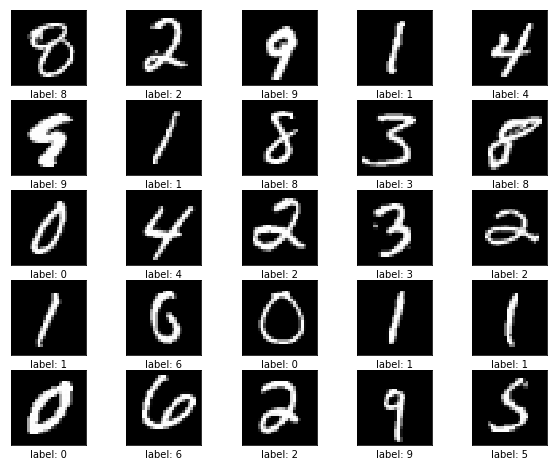

In [3]:
samp_idx =  np.random.choice(np.arange(train_images.shape[0]), 25, replace=False)
plt.figure(figsize=(10, 8))
plt.title("Sample of Handwritten Digits")
for i in range(25):
    plt.subplot(5, 5, i+1)
    
    idx  = samp_idx[i]
    plt.imshow(train_images[idx], cmap="gray")
    plt.xlabel("label: %i" %train_labels[idx])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

## Define Model with Keras
Train and validate with tf.data.Dataset objects

In [4]:
def preprocess(x):
    out =  x.reshape(-1, 28, 28, 1).astype(np.float32)
    out = out / 255
    return out

train_images = preprocess(train_images)
val_images = preprocess(val_images)

In [5]:
train_labels_enc = tf.one_hot(train_labels, depth=10)
val_labels_enc = tf.one_hot(val_labels, depth=10)

In [20]:
BUFFER_SIZE = 10000
BATCH_SIZE = 128
STEPS_PER_EPOCH = np.ceil(train_labels.shape[0] / BATCH_SIZE).astype(np.int64)
VAL_STEPS = np.ceil(val_labels.shape[0] / BATCH_SIZE).astype(np.int64)
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels_enc))
train_data = train_data.shuffle(BUFFER_SIZE)\
                       .batch(BATCH_SIZE)\
                       .repeat()

val_data = tf.data.Dataset.from_tensor_slices((val_images,  val_labels_enc))
val_data = val_data.shuffle(BUFFER_SIZE)\
                   .batch(BATCH_SIZE)\
                   .repeat()

In [21]:
# LeNet
model = keras.Sequential()
model.add(keras.layers.Conv2D(20, kernel_size=(5, 5)))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(50, kernel_size=(5, 5)))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
               loss = "categorical_crossentropy",
               metrics = ["acc"])

In [23]:
history = model.fit(train_data,
                    epochs=10, 
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_data = val_data,
                    validation_steps = VAL_STEPS)

Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1717 - acc: 0.9510 - val_loss: 0.0560 - val_acc: 0.9834
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0460 - acc: 0.9859 - val_loss: 0.0287 - val_acc: 0.9920
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0306 - acc: 0.9902 - val_loss: 0.0290 - val_acc: 0.9916
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0227 - acc: 0.9933 - val_loss: 0.0290 - val_acc: 0.9906
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0174 - acc: 0.9945 - val_loss: 0.0176 - val_acc: 0.9946
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0138 - acc: 0.9955 - val_loss: 0.0128 - val_acc: 0.9964
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0115 - acc: 0.9964 - val_loss: 0.0087 - val_acc: 0.9967
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Training and Validation Losses")
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label = "validation")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(frameon=False, loc=2, bbox_to_anchor=(1, 1))
plt.show()

print("Training Accuracy: %.2f%%" % (history.history["acc"][-1]*100))
print("Validation Accuracy: %.2f%%" % (history.history["val_acc"][-1]*100))

In [14]:
val_images.shape[0] // BATCH_SIZE

78

In [19]:
STEPS_PER_EPOCH

469.0